<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_data_add_delta_(3_6)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_3.6'

In [4]:
os.listdir(base_path)

['data_add_delta_3.6_n20.csv',
 'data_add_delta_3.6_n30.csv',
 'data_add_delta_3.6_n60.csv',
 'data_add_delta_3.6_n120.csv',
 'data_add_delta_3.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_3.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.502962,64.614808,29.925242,21.670740,1121.001856,1332.715608,516.815575,815.900033
1,0.0,1.0,79.287148,27.708449,60.291490,41.898042,-470.438773,-251.253644,456.627631,-707.881275
2,0.0,2.0,26.089637,20.790467,59.010865,46.118061,127.861748,289.870779,-96.482309,386.353088
3,0.0,3.0,29.005762,52.677918,48.809704,54.672324,2583.143706,2778.309414,-90.276575,2868.585989
4,0.0,4.0,85.111521,78.385105,30.527257,25.217876,-758.618797,-529.377037,529.431780,-1058.808817
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.720098,36.321211,44.579246,40.889687,679.297817,899.808059,313.776056,586.032003
249996,999.0,246.0,74.327569,48.745846,80.109071,61.057430,698.220735,972.460651,370.929381,601.531270
249997,999.0,247.0,64.178483,35.870721,71.634502,59.202917,-260.134981,-19.248358,331.030452,-350.278810
249998,999.0,248.0,77.573423,69.906590,75.362877,52.048550,-220.704185,64.187255,496.228555,-432.041300


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.502962,64.614808,29.925242,21.670740,1121.001856,1332.715608,516.815575,815.900033
1,0.0,1.0,79.287148,27.708449,60.291490,41.898042,-470.438773,-251.253644,456.627631,-707.881275
2,0.0,2.0,26.089637,20.790467,59.010865,46.118061,127.861748,289.870779,-96.482309,386.353088
3,0.0,3.0,29.005762,52.677918,48.809704,54.672324,2583.143706,2778.309414,-90.276575,2868.585989
4,0.0,4.0,85.111521,78.385105,30.527257,25.217876,-758.618797,-529.377037,529.431780,-1058.808817
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.720098,36.321211,44.579246,40.889687,679.297817,899.808059,313.776056,586.032003
249996,999.0,246.0,74.327569,48.745846,80.109071,61.057430,698.220735,972.460651,370.929381,601.531270
249997,999.0,247.0,64.178483,35.870721,71.634502,59.202917,-260.134981,-19.248358,331.030452,-350.278810
249998,999.0,248.0,77.573423,69.906590,75.362877,52.048550,-220.704185,64.187255,496.228555,-432.041300


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.502962  64.614808  29.925242  21.670740  1121.001856   
      1.0    79.287148  27.708449  60.291490  41.898042  -470.438773   
      2.0    26.089637  20.790467  59.010865  46.118061   127.861748   
      3.0    29.005762  52.677918  48.809704  54.672324  2583.143706   
      4.0    85.111521  78.385105  30.527257  25.217876  -758.618797   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.720098  36.321211  44.579246  40.889687   679.297817   
      246.0  74.327569  48.745846  80.109071  61.057430   698.220735   
      247.0  64.178483  35.870721  71.634502  59.202917  -260.134981   
      248.0  77.573423  69.906590  75.362877  52.048550  -220.704185   
      249.0  86.437314  41.722422  78.583349  40.859514  2655.155899   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1332.715608  516.815575   815.900033  
      1.0    -251.253644  456.627631  -707.881275  
      2.0     289.870779  -96.482309   386.353088  
      3.0    2778.309414  -90.276575  2868.585989  
      4.0    -529.377037  529.431780 -1058.808817  
...                  ...         ...          ...  
999.0 245.0   899.808059  313.776056   586.032003  
      246.0   972.460651  370.929381   601.531270  
      247.0   -19.248358  331.030452  -350.278810  
      248.0    64.187255  496.228555  -432.041300  
      249.0  2912.758498  426.292672  2486.465826  

[250000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.502962  64.614808  29.925242  21.670740  1121.001856   
      1.0    79.287148  27.708449  60.291490  41.898042  -470.438773   
      2.0    26.089637  20.790467  59.010865  46.118061   127.861748   
      3.0    29.005762  52.677918  48.809704  54.672324  2583.143706   
      4.0    85.111521  78.385105  30.527257  25.217876  -758.618797   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.720098  36.321211  44.579246  40.889687   679.297817   
      246.0  74.327569  48.745846  80.109071  61.057430   698.220735   
      247.0  64.178483  35.870721  71.634502  59.202917  -260.134981   
      248.0  77.573423  69.906590  75.362877  52.048550  -220.704185   
      249.0  86.437314  41.722422  78.583349  40.859514  2655.155899   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1332.715608  516.815575   815.900033  
      1.0    -251.253644  456.627631  -707.881275  
      2.0     289.870779  -96.482309   386.353088  
      3.0    2778.309414  -90.276575  2868.585989  
      4.0    -529.377037  529.431780 -1058.808817  
...                  ...         ...          ...  
999.0 245.0   899.808059  313.776056   586.032003  
      246.0   972.460651  370.929381   601.531270  
      247.0   -19.248358  331.030452  -350.278810  
      248.0    64.187255  496.228555  -432.041300  
      249.0  2912.758498  426.292672  2486.465826  

[250000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,85.502962,64.614808,29.925242,21.670740,1121.001856,1332.715608,516.815575,815.900033
1,0.0,1.0,79.287148,27.708449,60.291490,41.898042,-470.438773,-251.253644,456.627631,-707.881275
2,0.0,2.0,26.089637,20.790467,59.010865,46.118061,127.861748,289.870779,-96.482309,386.353088
3,0.0,3.0,29.005762,52.677918,48.809704,54.672324,2583.143706,2778.309414,-90.276575,2868.585989
4,0.0,4.0,85.111521,78.385105,30.527257,25.217876,-758.618797,-529.377037,529.431780,-1058.808817
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,88.720098,36.321211,44.579246,40.889687,679.297817,899.808059,313.776056,586.032003
249996,999.0,246.0,74.327569,48.745846,80.109071,61.057430,698.220735,972.460651,370.929381,601.531270
249997,999.0,247.0,64.178483,35.870721,71.634502,59.202917,-260.134981,-19.248358,331.030452,-350.278810
249998,999.0,248.0,77.573423,69.906590,75.362877,52.048550,-220.704185,64.187255,496.228555,-432.041300


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4            e  \
rep   index                                                            
0.0   0.0    85.502962  64.614808  29.925242  21.670740  1121.001856   
      1.0    79.287148  27.708449  60.291490  41.898042  -470.438773   
      2.0    26.089637  20.790467  59.010865  46.118061   127.861748   
      3.0    29.005762  52.677918  48.809704  54.672324  2583.143706   
      4.0    85.111521  78.385105  30.527257  25.217876  -758.618797   
...                ...        ...        ...        ...          ...   
999.0 245.0  88.720098  36.321211  44.579246  40.889687   679.297817   
      246.0  74.327569  48.745846  80.109071  61.057430   698.220735   
      247.0  64.178483  35.870721  71.634502  59.202917  -260.134981   
      248.0  77.573423  69.906590  75.362877  52.048550  -220.704185   
      249.0  86.437314  41.722422  78.583349  40.859514  2655.155899   

                       Y       y_hat        e_hat  
rep   index                                        
0.0   0.0    1332.715608  516.815575   815.900033  
      1.0    -251.253644  456.627631  -707.881275  
      2.0     289.870779  -96.482309   386.353088  
      3.0    2778.309414  -90.276575  2868.585989  
      4.0    -529.377037  529.431780 -1058.808817  
...                  ...         ...          ...  
999.0 245.0   899.808059  313.776056   586.032003  
      246.0   972.460651  370.929381   601.531270  
      247.0   -19.248358  331.030452  -350.278810  
      248.0    64.187255  496.228555  -432.041300  
      249.0  2912.758498  426.292672  2486.465826  

[250000 rows x 8 columns]

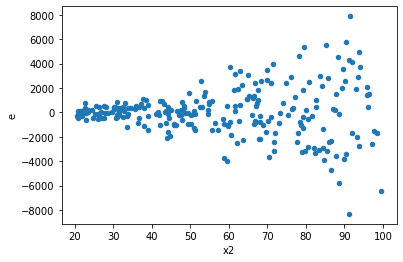

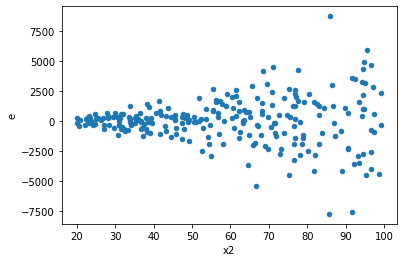

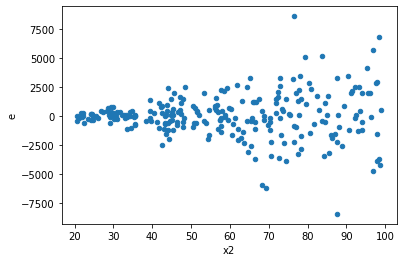

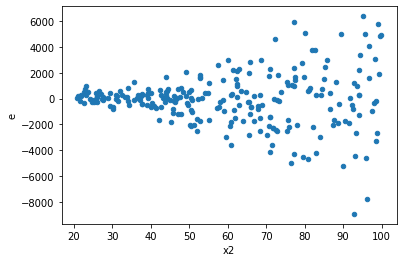

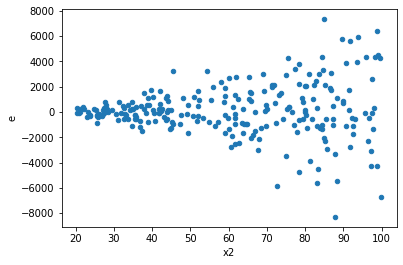

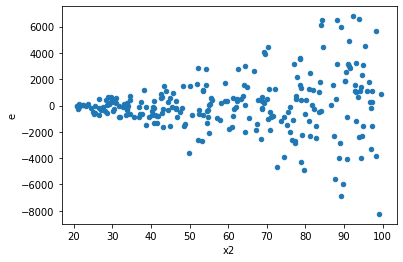

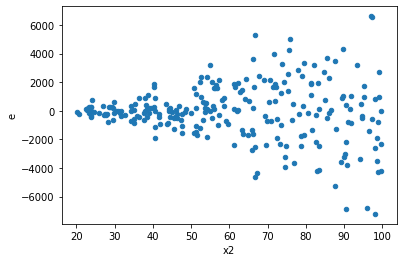

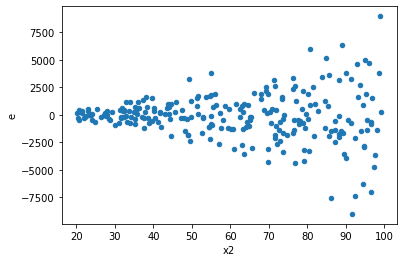

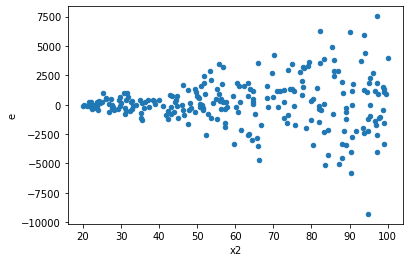

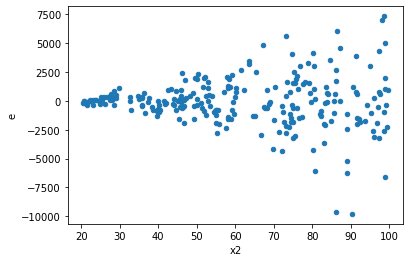

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,96.0,96.0,34487763.946238436,802960605.2032136,359247.5411066504,8364172.970866808,23.282477995816603,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,32206314.850261446,768360300.3292505,335482.4463568901,8003753.128429692,23.857442365002928,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,61301873.34127556,704564402.5901948,638561.1806382871,7339212.526981196,11.493358427527859,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,40281396.459958985,853276767.833563,419597.87979123945,8888299.664932948,21.182899373455133,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,51985217.259450585,827717412.2085863,541512.6797859436,8622056.377172774,15.9221689519459,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,68974476.41056968,915494825.8501874,718484.1292767675,9536404.435939452,13.27295071296687,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,54667237.937064,731961885.0124713,569450.39517775,7624602.968879909,13.389406756843046,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,65918213.376022235,912416924.8737082,686648.0560002316,9504342.96743446,13.841651315228152,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,48702806.16166722,792583627.8916311,507320.89751736686,8256079.457204491,16.273880097600088,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,96.0,96.0,34487763.946238436,802960605.2032136,359247.5411066504,8364172.970866808,23.282477995816603,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,96.0,96.0,32206314.850261446,768360300.3292505,335482.4463568901,8003753.128429692,23.857442365002928,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,96.0,96.0,61301873.34127556,704564402.5901948,638561.1806382871,7339212.526981196,11.493358427527859,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,96.0,96.0,40281396.459958985,853276767.833563,419597.87979123945,8888299.664932948,21.182899373455133,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,96.0,96.0,51985217.259450585,827717412.2085863,541512.6797859436,8622056.377172774,15.9221689519459,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,96.0,96.0,68974476.41056968,915494825.8501874,718484.1292767675,9536404.435939452,13.27295071296687,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,96.0,96.0,54667237.937064,731961885.0124713,569450.39517775,7624602.968879909,13.389406756843046,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
7.0,96.0,96.0,65918213.376022235,912416924.8737082,686648.0560002316,9504342.96743446,13.841651315228152,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,96.0,96.0,48702806.16166722,792583627.8916311,507320.89751736686,8256079.457204491,16.273880097600088,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64